# COGS 118A- Project Proposal

# Project Description

You will design and execute a machine learning project. There are a few constraints on the nature of the allowed project. 
- The problem addressed will not be a "toy problem" or "common training students problem" like mtcars, iris, palmer penguins etc.
- The dataset will have >1k observations and >5 variables. I'd prefer more like >10k observations and >10 variables. A general rule is that if you have >100x more observations than variables, your solution will likely generalize a lot better. The goal of training a supervised machine learning model is to learn the underlying pattern in a dataset in order to generalize well to unseen data, so choosing a large dataset is very important.

- The project will include a model selection and/or feature selection component where you will be looking for the best setup to maximize the performance of your ML system.
- You will evaluate the performance of your ML system using more than one appropriate metric
- You will be writing a report describing and discussing these accomplishments




# Names

- Alan Cao (A16160244)
- Connie Chang (A16651609)
- Helen Zhao (A15919169)
- Shawn Kim (A15785021)
- Robert Aispuro (A12086294)


# Abstract 

Heart disease is a common cause of death in the United States. Using data from the Center for Disease Control and Prevention (CDC), we will create a predictive machine learning model that is effective in detecting heart disease. We will conduct both logistic regression and random forest decision tree methods to analyze the effects of heart disease on factors including smoking, age, and alcohol usage. By analyzing this data set, we aim to grasp a better understanding of heart disease and hopefully reduce the number of cardiovascular deaths overall. Performance will be measured using metrics including precision and the F1 score.



# Background

According to the CDC, heart disease is the leading cause of death in the United States. However, the prediction of cardiovascular disease still remains as a challenge in the area of clinical data analysis despite the continuous growth of science and technology. It goes without saying that identifying coronary heart disease during the early stages is beneficial in minimizing the development of the disease and thus preventing the need for treatment. Therefore it is extremely important to continue to develop more effective ways of more accurately identifying risk factors that play a role in predicting heart disease. 

Previous research has shown that traditional cardiovascular risk factors are nearly equally valuable in assessing the likelihood of someone developing CHD as a looking at a genetic test. The risk factors listed include blood pressure, cholesterol levels, diabetes, and smoking status<a name="Wilson"></a>[<sup>[1]</sup>](#Wilsonnote). Even though the genetic risk scores doesn't seem to necessarily add more predictive value, it is still necessary to develop a model that uses either traditional or genetic variables to more accurately predict CHD. Another article states that there is no clear difference in the effectiveness of using either categorical or continuous values of those risk factors in the prediction. Furthermore, the article discusses the limitations of their findings because of the exclusion of certain candidate variables. Such variables include family history of CHD, fibrinogen, exercise, and body mass index (BMI)<a name="UTSouth"></a>[<sup>[2]</sup>](#UTSouthnote). Therefore, further research needs to be done on the predictive value of these excluded variables as well as the effectiveness of having a mixture of discrete and continuous variables in the predictive model.

Due to the nature of heart disease risk factors to be complex and to depend largely on environmental factors, it is important to develop a model that is able to take these into consideration. Machine learning algorithms have been used in the past to detect and address the severity of the heart disease of patients. In terms of accuracy, random forest, support vector machine, deep learning, VOTE, and HRFLM are some of the best classification methods<a name="Mohan"></a>[<sup>[3]</sup>](#Mohannote). Although this paper has analyzed the effectiveness of different machine learning models, further extension is needed to use real-world datasets on these models as the paper only used simulations and theoretical approaches. 

# Problem Statement



The problem we are trying to solve is to better predict which factors influence cardiovascular disease whether that be indirectly or directly. We are going to run a logistical regression on the variables. We will be using a group of techniques in order to balance the class distribution for our dataset since it has a skewed class distribution. By classifing our variables in a binary "Yes" or "No" format, we can predict which factors play a role in heart disease. We will run this alongside our whole dataset in order to replicate it with over 400,000 other patients in order to see if our model is accurate.

# Data

Link/Reference: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

The dataset includes 18 variables and just over 300,000 observations. An observation consists of attributes such as a person's BMI, whether they smoked, their age, sex, and whether they contracted a heart disease. Some crucial variables are sex represented by "Male" and "Female" and age which is represented by an interval. Some boolean values are represented by "Yes" or "No". We will need to transform these values into a numerical format (1s and 0s) in order to process them. We also have categorical variables like General Health which we can convert numerically with one hot encoding. Given these variables and which observations had heart disease, we will be able to predict how attributes contribute to cardivascular disease the most and take steps in order to prevent disease.



# Data Cleaning

Our overall data cleaning steps are described as below:
1. First,we drop all the nan rows
2. Then we drop the irrevelant columns we dont need. PhyscialActivity and MentalHealth.
3. We then keep rows from the 'Diabetic' column that are only 'Yes' or 'No'
4. Next, we keep rows where the average sleep is < 24 hours because 24 hours is impossible.
5. Then, we change all 'Yes' and 'No' values to 1 and 0 where 1 = True and 0 = False
6. Finally, we reduce the number of categories from 13 to 3. Adult = 18-39. Middle Age = 40-59. Senior = 60 and up


The number of variables in our dataset is 16. The number of observations is 310426. Each observation represents an individual adult interviewer who participated in the survey that the dataset was formed from. 

HeartDisease = Have you ever reported having heart disease

BMI = Body Mass Index

Smoking = Have you smoked at least 5 packs of cigarettes in your entire life? 

AlcoholDrinking = Yes if adult man has more than 14 drinks per week or adult woman has more than 7 drinks per week. No if anything else

Stroke = Have you ever been told that you had a stroke?

DiffWalking = Have you ever had serious difficulty walking or climbing stairs?

Sex = Are you male or female?

AgeCategory = 3 level age category Adult = 18-39. Middle Age = 40-59. Senior = 60 and up

Race = What is your race? 

Diabetic = Have you ever been told you have diabetes?

PhysicalActivity = Have you done physical activity or exercise during the past 30 days other than your regular job?

GenHealth = On a scale from Poor, Fair, Good, Very Good, and Excellent, what would you say that in general your health is?

SleepTime = On average, how many hours of sleep do you get in a 24-hour period?

Asthma = Have you ever been told you had asthma?

KidneyDisease = Have you ever been told you had kidney disease?(Does NOT include kidney stones)

SkinCancer = Have you ever been told you have Skin Cancer? 


In [ ]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load dataset

df = pd.read_csv('heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
df.dropna(inplace=True) # Drop all nan rows
df.drop(columns=['PhysicalHealth', 'MentalHealth'], inplace=True) # Drop specific columns

In [ ]:
df.columns # Print remaining columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer'],
      dtype='object')

In [ ]:
# Keep rows from the 'Diabetic' column that are only 'Yes' or 'No'
df = df[(df['Diabetic'] == 'Yes') | (df['Diabetic'] == 'No')]

# Keep rows where the average sleep is < 24 hours because 24 hours impossible
df = df[df['SleepTime'] < 24.0]

# Change all 'Yes' and 'No' values to 1 and 0 where 1 = True and 0 = False
converted_bools = {'Yes': 1, 'No': 0}
df.replace({'HeartDisease': converted_bools, 
                 'Smoking': converted_bools, 
                 'AlcoholDrinking': converted_bools,
                 'Stroke': converted_bools,
                 'DiffWalking': converted_bools,
                 'Diabetic': converted_bools,
                 'PhysicalActivity': converted_bools,
                 'Asthma': converted_bools,
                 'KidneyDisease': converted_bools,
                 'SkinCancer': converted_bools,
                 }, inplace=True)

df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,0,Female,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,0,Male,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0,Female,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,1,Female,40-44,White,0,1,Very good,8.0,0,0,0


In [ ]:
#Reduce the number of categories from 13 to 3. Adult = 18-39. Middle Age = 40-59. Senior = 60 and up
df.AgeCategory.replace(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64',
                         '65-69', '70-74', '75-79', '80 or older'], ['Adult','Adult','Adult','Adult',
                                                                     'Middle Age','Middle Age','Middle Age','Middle Age',
                                                                     'Senior','Senior','Senior','Senior','Senior',], inplace=True)
#Show the count of the 3 new categories
df['AgeCategory'].value_counts()

Senior        139910
Middle Age     94942
Adult          75574
Name: AgeCategory, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


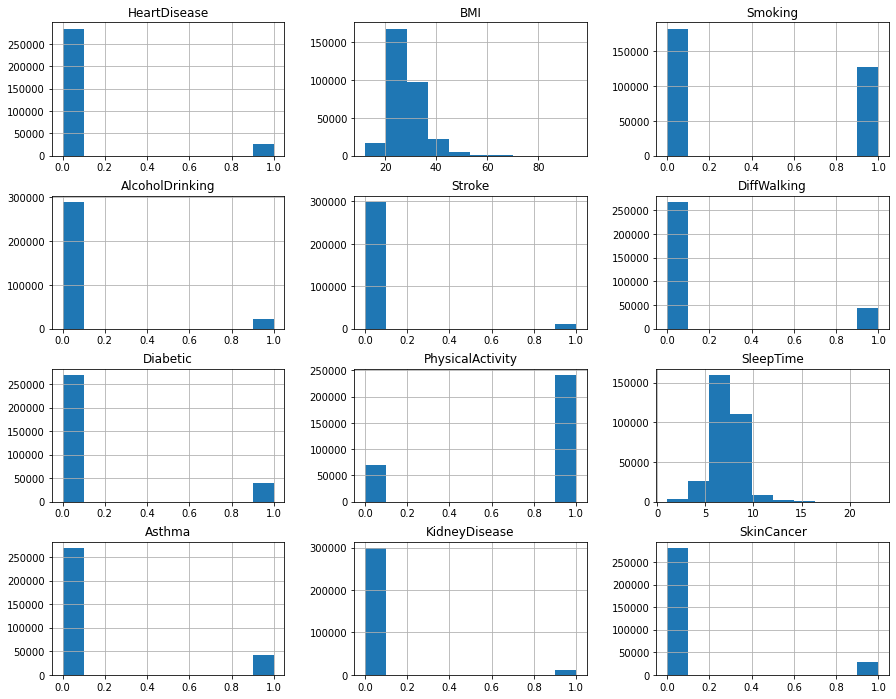

In [ ]:
# Show the distribution of data 

fig = plt.figure(figsize=(15, 12))
ax = fig.gca()
df.hist(ax=ax);

In [ ]:
df.describe() # Some useful info about columns after transforming

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,DiffWalking,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer
count,310426.000000,310426.000000,310426.000000,310426.000000,310426.000000,310426.000000,310426.000000,310426.000000,310426.000000,310426.000000,310426.000000,310426.000000
mean,0.085270,28.273736,0.412205,0.068496,0.037500,0.137427,0.131413,0.776398,7.098516,0.132795,0.036775,0.093249
std,0.279283,6.327952,0.492232,0.252596,0.189984,0.344298,0.337852,0.416659,1.425073,0.339354,0.188210,0.290782
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,23.990000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.280000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,31.320000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000,1.000000,1.000000,1.000000


In [ ]:
#One Hot Encode All the columns you can
#Age
age_category = pd.get_dummies(df['AgeCategory'])
df = pd.concat([df, age_category], axis=1)
df = df.drop(['AgeCategory'], axis=1)
#Gen Health
race = pd.get_dummies(df['GenHealth'])
df = pd.concat([df, race], axis=1)
df = df.drop(['GenHealth'], axis=1)
#Race
ethnicity = pd.get_dummies(df['Race'])
df = pd.concat([df, ethnicity], axis=1)
df = df.drop(['Race'], axis=1)
#Sex
sex = pd.get_dummies(df['Sex'])
df = pd.concat([df, sex], axis=1)
df = df.drop(['Sex'], axis=1)


In [ ]:
#Show the # of Variables and Observations
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,DiffWalking,Diabetic,PhysicalActivity,SleepTime,Asthma,...,Poor,Very good,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White,Female,Male
0,0,16.60,1,0,0,0,1,1,5.0,1,...,0,1,0,0,0,0,0,1,1,0
1,0,20.34,0,0,1,0,0,1,7.0,0,...,0,1,0,0,0,0,0,1,1,0
2,0,26.58,1,0,0,0,1,1,8.0,1,...,0,0,0,0,0,0,0,1,0,1
3,0,24.21,0,0,0,0,0,0,6.0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,23.71,0,0,0,1,0,1,8.0,0,...,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,1,1,0,6.0,1,...,0,0,0,0,0,1,0,0,0,1
319791,0,29.84,1,0,0,0,0,1,5.0,1,...,0,1,0,0,0,1,0,0,0,1
319792,0,24.24,0,0,0,0,0,1,6.0,0,...,0,0,0,0,0,1,0,0,1,0
319793,0,32.81,0,0,0,0,0,0,12.0,0,...,0,0,0,0,0,1,0,0,1,0


# Proposed Solution

Our team will be running a logistic regression and a random decision forest. Logistic regression models the probability of discrete outcomes and is useful for classification tasks. We will be classifying the 18 variables to 'yes' or 'no' to predict the major factors that influence heart disease. The other algorithm we will be running is random decision forest, which is made up of many individual decision trees. Each individual tree in the random forest represents a variable and outputs a class prediction. The variable that ends up with the most votes will be our model’s prediction and the most significant factor that leads to heart disease.

We decided to remove the 'PhysicalHealth' and 'MentalHealth' columns because they were the number of days an individual felt like their physical and mental health was not good. This could be due to a variety of factors that are not all included as columns in our data set. We decided to keep 'GenHealth' as it was a more useful representation of an individual's health due to it being a categorical variable on a likert scale. We can categorize individuals under a certain health category.

We removed rows from the 'Diabetic' column because some rows contained a conditional 'Yes' or 'No', meaning it contained individuals who were borderline diabetic or diabetic when pregnant. We removed them because keeping certain rows could have unintentionally skewed other variables such as an individual's BMI. We also removed some rows where individuals recorded their average 'SleepTime' to be 24 hours which should be impossible.

# Evaluation Metrics

Our team will use precision as our evaluation metric. Because heart disease is a condition that endangers lives, using precision would reduce false negatives, decreasing the chance of a patient with heart disease to have a negative result. However, increasing precision would decrease recall, increasing the number of False Positives (the chance a patient without heart disease has a positive result). Precision is calculated by dividing the sum of the True Positives by the sum of all of the Predicted Conditions (True Positives + (True Positives + False Positives)).

Another evaluation metric our team can use is the F1 score. The F1 score would take into account both precision and recall to reduce both false positives and false negatives. It is calculated by dividing the True Positives / True Positives + 0.5(False Positives + False Negatives).

# Results

## Analysis of the Problem


For our problem of detecting Heart Disease in patients, it is crucial to ensure that the number of false negatives is as low as posible -- even potentially at the cost of more false positives. This is because we would much rather predict someone who doesn't have heart disease to have heart disese rather than the opposite. There are much more stakes for not detecting the disease since we will be ultimately endangering someone's life. In order to start working on this problem, we have decided to use Logisitic Regression as our baseline model and to compare it against more powerful machine learning models (including K-Nearest Neighbors, KMeans, Decision Tree, and Random Forest) to determine the best algorithm. The reason for using these various models is because there is no one answer why one model would be better than another type of model. Therefore, we aim to determine the best model for predicting heart disease in hopes of helping health care professionals.



## Model #1: Baseline Model


### Logistic Regression

In [ ]:
import numpy as np
import sklearn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

# split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

# fit logtistic regression model
clf = LogisticRegression(random_state=42, max_iter=10000).fit(X_train, y_train)

# make predicitions
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# model evaluation
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
              
print('Precision: %.3f, Recall: %.3f, F1: %.3f' %(precision, recall, f1))

Precision: 0.542, Recall: 0.102, F1: 0.171


From the above evaluation scores, we noticed that the baseline Logistic model performs quite poorly doing the heart disease prediction. This might be because the linear decision boundary that this model generates can be too simple. Therefore, we will look at other models that generate a non-linear decision boundary below.  

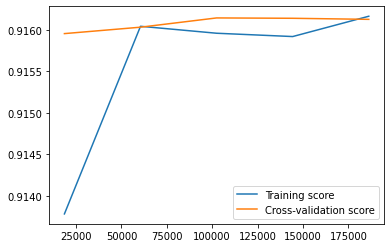

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(clf, X_train, y_train, cv=5)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training score")
plt.plot(train_sizes, np.mean(valid_scores, axis=1), label="Cross-validation score")
plt.legend()
plt.show()

Looking at the above learning curve, we can see that it asymptotes at around 60,000 data points in the training set. Therefore, we concluded that Logistic Regression would do well with KFolds Cross Validation (we perform this cross validation in the Cross validation section below).

## Model #2: Random Forest Classifier Model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# split the dataset into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(232819, 27) (77607, 27) (232819,) (77607,)


In [ ]:
#Run a Random Forest on the dataset
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
# yPred value that will make a prediction on the dataset
yPred = model.predict(X_test)
# Accuracy score to evaulate our prediction
acc = accuracy_score(y_test, yPred)
print('Accuracy: %.3f' % acc)

Accuracy: 0.894


In [ ]:
# Get Precisin Score for model
from sklearn.metrics import precision_score
precision_score(y_test, yPred, average=None)

array([0.92519194, 0.29420849])

In [ ]:
# Get Recall Score for model
from sklearn.metrics import recall_score
recall_score(y_test, yPred, average=None)

array([0.96135252, 0.17167318])

In [ ]:
# Get F1 Score for model
from sklearn.metrics import f1_score
f1_score(y_test, yPred, average=None)

array([0.94292567, 0.21682633])

The above scores show that the evaluation metrics for detecting a patient with heart disease (precision: 0.92519194, recall: 0.96135252, f1-score: 0.94292567) perform well overall. The random forest model performed significantly better than the Logistic Regression. This allows us to assume that the more flexible (soft) decision boundary might be more predictive with our heart disease dataset than a hard decision boundary.

We now move on to decide what cross validation method would suit random forest the best. 

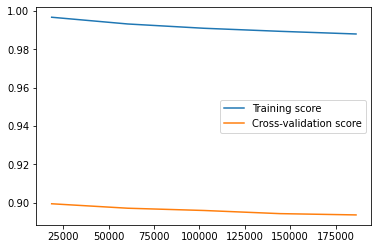

In [ ]:
train_sizes, train_scores, valid_scores = learning_curve(model, X_train, y_train, cv=5)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training score")
plt.plot(train_sizes, np.mean(valid_scores, axis=1), label="Cross-validation score")
plt.legend()
plt.show()

The learning curve above shows us that we might not have enough training data as it is not clear whether or not the learning curve asymptotes. However, as the training score is above the cross-validation score, it is likely that the random forest model is overfitting the data. The problem with overfitting, is that the more specialized the model becomes to training data, the less well it is able to generalize to new data, resulting in an increase in generalization error. From this we move on to a less specialized model: the decision tree. 

## Model #3: Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split train/test data
X = df.drop(columns="HeartDisease")
y = df["HeartDisease"]
feature_names = X.columns
labels = y.unique()
strings = [str(x) for x in labels]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# baseline tree fit
clf_dt = DecisionTreeClassifier(max_depth =3, random_state = 42)
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
# Test the Decision Tree
test_pred_decision_tree = clf_dt.predict(X_test)

In [ ]:
#import the relevant packages
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,  
                                            test_pred_decision_tree)

In [ ]:
# Precision 
precision = metrics.precision_score(y_test,
                                   test_pred_decision_tree, 
                                   average=None)
# turn it into a dataframe
precision_results = pd.DataFrame(precision, index=labels)
# rename the results column
precision_results.rename(columns={0:'precision'}, inplace =True)

# Recall 
recall = metrics.recall_score(y_test, test_pred_decision_tree, 
                              average =None)
recall_results = pd.DataFrame(recall, index= labels)
recall_results.rename(columns ={0:'Recall'}, inplace =True)

# F1-Score
f1 = metrics.f1_score(y_test, test_pred_decision_tree, average=None)
f1_results = pd.DataFrame(f1, index=labels)

f1_results.rename(columns={0:'f1'}, inplace=True)

print("Decision Tree Evaluation Scores: \n")
print(precision_results.join(recall_results.join(f1_results)))

Decision Tree Evaluation Scores: 

   precision    Recall        f1
0   0.916878  0.996885  0.955209
1   0.526767  0.036948  0.069053


The evaluation metrics of the Decision Tree perform roughly the same as the Random Forest. It is marginally worse for precision (Random Forest precision: 0.92519194) and marginally better for recall (Random Forest recall: 0.96135252). 

We then move on to look at the learning curve

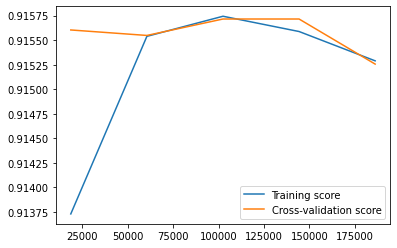

In [ ]:
train_sizes, train_scores, valid_scores = learning_curve(clf_dt, X_train, y_train, cv=5)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training score")
plt.plot(train_sizes, np.mean(valid_scores, axis=1), label="Cross-validation score")
plt.legend()
plt.show()

From the learning curve above, we have concluded that performing KFolds Cross Validation would be feasible as the learning curve asymptotes. The Cross Validation is later done in the Model Selection section.

## Model #4: K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, f1_score

# Create KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, knn_predict)}')
print(f'Precision: {precision_score(y_test, knn_predict)}')
print(f'Recall: {recall_score(y_test, knn_predict)}')
print(f'F-score: {f1_score(y_test, knn_predict)}')

Accuracy: 0.9078562500805339
Precision: 0.373134328358209
Recall: 0.10889155902673475
F-score: 0.16858504825020346


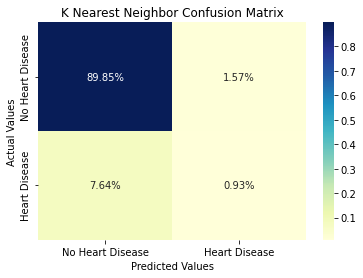

In [ ]:
from sklearn.metrics import confusion_matrix

cm  = confusion_matrix(y_test, knn_predict)
ax = sns.heatmap(np.divide(cm, np.sum(cm)), annot=True, cmap='YlGnBu', fmt='.2%')

# Plot details
ax.set_title('K Nearest Neighbor Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');
ax.xaxis.set_ticklabels(['No Heart Disease', 'Heart Disease'])
ax.yaxis.set_ticklabels(['No Heart Disease', 'Heart Disease'])

plt.show()

Unfortunately, when we tried to run the learning curve on KNN, the algorithm timed out. Therefore, we decided that the KNN model might be too computationally intensive for solving the problem of heart disease prediction.

## Model Selection 
For this section, the main model that we want to tune is the Decision Tree. This is because this model wasn't overly computationally intensive (such as the KNN model), and it seemed like it have enough training data to perform KFolds Cross Validation. Furthermore, the above Decision Tree didn't overfit as much as the Random Forest. 

#### Tuning Hyper-Parameters For Decision Tree

In [ ]:
%%time
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate, ShuffleSplit

cv = ShuffleSplit(n_splits=30, test_size=0.2)

max_depth_dt = [1, 2, 3, 4, 5, 6, 7]
train_scores_dt, test_scores_dt = validation_curve(
    clf_dt, X_test, y_test, param_name="max_depth", param_range=max_depth_dt,
    cv=5, scoring="neg_mean_absolute_error", n_jobs=2)
train_errors_dt, test_errors_dt = -train_scores_dt, -test_scores_dt

CPU times: user 432 ms, sys: 114 ms, total: 546 ms
Wall time: 4.63 s


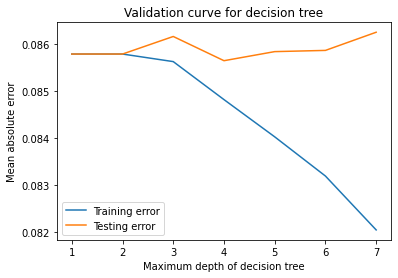

In [ ]:
plt.plot(max_depth_dt, train_errors_dt.mean(axis=1), label="Training error")
plt.plot(max_depth_dt, test_errors_dt.mean(axis=1), label="Testing error")
plt.legend()

plt.xlabel("Maximum depth of decision tree")
plt.ylabel("Mean absolute error")
_ = plt.title("Validation curve for decision tree")

Suprisingly, the max_depth of the decision tree seems to overfit when the value is greater than 3. Using the Principle of Parsimony, we decided that it is best to keep the hyperparameter as the most simple given that the hyperparameters greater than 3 perform around the same. Given this new knowledge and the face that our initial decision tree model uses a max_depth of 3, we decided that we won't need to change the hyperparameters. 

#### Evalutating model performance for Logistic Regression using Cross Validation 

In [ ]:
#K FOLD CROSS VALIDATION
from sklearn.model_selection import cross_val_score,KFold

kf = KFold(n_splits=5)
score = cross_val_score(clf,X_train,y_train,cv=kf, scoring="precision")
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Finally, the motivation for performing cross valiation on the Logistic Regression was to confirm whether or not our baseline model is even remotely comparable to the other models that we had used. The above cross validation  wanted to confirm that the Logistic Regression is not generalizable to the entire dataset and that it performs significantly worse than the other models. 

# **Discussion**
## Interpreting the result
So when we look back at the evaluation metrics with our new models, we see that the best performing model was the decision tree model.

Comparing the evaluation metrics, we can see the difference between the Decision Tree and Random Forest models is very marginal. Although the Random Forest model had higher evaluation metrics in precision (RF: 0.9251 vs DT: 0.9156) and the Decision Tree had higher evaluation metrics in F1 Score (RF: 0.9552 vs DT: 0.96), the difference between the two is very small. Because the Linear Regression (0.542) and K-Nearest Neighbors (0.3514) models resulted in low precision and F1 Scores, we did not consider them for selection. 

Using to the Principal of Parsimony, we've selected the Decision Tree model as the better model because it is less complex than the Random Forest model with both being very similar in performance. Because of this, we believe the Decision Tree model would be a better model for selection.

According to the learning curves, the Decision Tree model would require significantly less trials than the Random Forest model. As a result, we believe the Decision Tree would be a better model for selection.

## Limitations
One limitation of our dataset is that we have a small number of observations that actually have heart disease (9%). This means our models might overfit on predicting whether people don't have heart disease. If we had time, one way of mitigating our unbalanced data would be to run a stratified cross validation. This would allow more equality in predicted heart disease because the folds are selected so that the mean response value is approximately equal in all the folds.

Another limitation is that our random forest model is overfitting as shown by the learning curve for random forest. To prevent overfitting in random forest, we need to tune our hyperparameters. Given more time, we could've performed k-fold cross validation to choose tuning parameters that minimizes test sample prediction error. 

Our dataset also encapsulates data from the CDC in the United States. Because of this our model might perform well on predicting heart disease in the United States, but might perform worse on data internationally such as the United Kingdom or Korea.

K-nearest neighbors's performance was very slow running upwards of 6-7 minutes. Our project highlighted the fact that k-nearest neighbors's efficiency slows down as the dataset grows. Another limitation about k-nearest neighbors is its performance on unbalanced data. In our case, k-nearest neighbors would give preference to people without heart disease and end up wrongly classifiying people who do have heart disease.

# Ethics & Privacy

The dataset utilized in this project relates to patient’s medical history with heart disease. Therefore, it is important that there is no way to tie a particular data point to any one individual, so it is anonymized. In terms of bias, one thing we do want to watch out for is to make sure that all the states in United States are represented in the dataset as to prevent bias, such as how differences in lifestyles in different states could impact risk for heart disease. To get a representative figure for each state, we consider the states as a whole, taking into account all of the regions as one. In order to address these concerns in bias, we have used a dataset from Kaggle that was originally from the CDC as part of the Behavioral Risk Factor Surveillance System (BRFSS). CDC states that BRFSS  collects data in all 50 states as well as the District of Columbia and three U.S. territories. The dataset also includes over 300,000 survey responses. As a result we can ensuring that a large majority of the regions in the United States could be represented in this study.

Overall, the data we use for this project has been collected fairly and passes our privacy considerations. In terms of intent, the purpose of this project is to discover possible correlations between participant lifestyles and risk for heart disease, without any goal to implicate or harm any individuals. Due to the fact that our data is anonymized, this project cannot be used to single out or direct harm to an individual. At its base, this project just offers an unbiased study on a prediction model for heart disease. 

# Team Expectations 

* *Fair amount of work distributed across each member of the group*
* *Make sure everyone is in the loop about what's happening*
* *If confused, reach out for help*
* *Try to get things done early*
* *COMMUNICATE! Communication is key and can solve alot of problems from even occuring*

# Project Timeline Proposal


| Meeting Date  | Meeting Time| Discuss at Meeting  | IGNORE |
|---|---|---|---|
| 4/28  |  1 PM |Determine best form of communication; Discuss and decide on final project methods;| 
| 4/29  |  10 AM |  Peer reviews of proposals due. Each group will get ~5 peer reviews which can help you make your project better. In addition, each of your group members will probably have reviewed different projects, so you should discuss among yourselves what you saw during that time. | 
| 5/1 | 10 AM  | Work on Checkpoint and schedule out time for midterms and everyone else. Midterms caught up with everyone so we kept up with anything we had to do and communicated any issues. We took a break since deadlines got pushed back.|
| 5/13  | 6 PM  | We got feedback from the TA so we talked about it on discord to see how we can incoporate it with our work. Checkpoint got delayed till next week|
|5/16  | 12 PM  | Finalize wrangling/EDA; Complete checkpoint preliminary results and any missing work |
| 5/19  | 12 PM  |We met up and worked on the project|
| 5/20  | Before 11:59 PM  |Checkpoint due. We finished the checkpoint and came out good! |


# Footnotes

<a name="Wilsonnote"></a>1.[^](#Wilson): Wilson, P. W. F., D’Agostino, R. B., Levy, D., Belanger, A. M., Silbershatz, H., &amp; Kannel, W. B. (1998, May 12). Prediction of coronary heart disease using risk factor categories. Circulation. Retrieved April 24, 2022, from https://www.ahajournals.org/doi/10.1161/01.cir.97.18.1837 

<a name="UTSouthnote"></a>2.[^](#UTSouth): Traditional risk factors predict heart disease about as well as sophisticated genetic test, study suggests. UT Southwestern Medical Center. (2020, February 18). Retrieved April 24, 2022, from https://www.utsouthwestern.edu/newsroom/articles/year-2020/predicting-heart-disease.html#:~:text=18%2C%202020%20%E2%80%93%20Traditional%20cardiovascular%20risk,that%20surveys%20millions%20of%20different 

<a name="Mohannote"></a>3.[^](#Mohan): Mohan, S., Thirumalai, C., &amp; Srivastava, G. (2019, June 19). Effective heart disease prediction using hybrid machine learning techniques. IEEE Xplore. Retrieved April 24, 2022, from https://ieeexplore.ieee.org/abstract/document/8740989#citations 